# Biological question: Are there differences in the binding distance of the same TF-pair in different clusters? - PART1
#### Exemplary Data: ....

### Outline of this notebook:
This notbook presents the first part of the analysis if there is a difference in the binding distance of the same TF-pair in different clusters. Here the first cluster is analysed. The results are then saved in a .csv file and imported in the part2 notebook, where the second cluster is analysed and also the comparison performed. 
    1. Implementation of distance analysis for first cluster and transfering in dataframe
    2. Saving results of first cluster in .csv file

## 1. Implementation of distance analysis for cluster
0. Creating folders for the structure if necessary
1. Read in path of the the pkl file from already performed market basket analysis (alternative: perform normal market basket analysis) (-> adjust for cluster)
2. selecting of TF-pairs
3. performing distance analysis with considering the noisiness (lower noise, "clearer/better" analysis)
4. Saving results with peak height above 2.8 in dataframe df_distance_clusterPART1 (-> adjust for cluster)



In [1]:
# The following lines, initally check if all file/paths are available. 
#If a result folder does not exist it is created automatically
import os
import pathlib
if not os.path.exists("./results/distanceresultsfordifference/"):
     pathlib.Path("./results/distanceresultsfordifference/").mkdir(parents=True, exist_ok=True)

In [11]:
import tfcomb.objects
clusterPART1_object = tfcomb.CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp1/main/heart_lv/heart_lv.2.Natural_killer_T_(NKT)_cell.pkl")
clusterPART1_object

<CombObj: 10456438 TFBS (746 unique names) | Market basket analysis: 550254 rules>

In [13]:
clusterPART1_object.simplify_rules()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


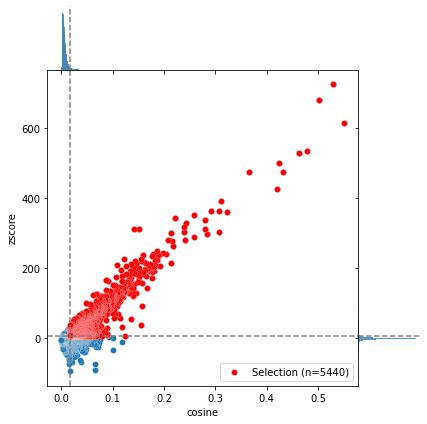

In [4]:
clusterPART1_object_selected = clusterPART1_object.select_significant_rules()

In [5]:
clusterPART1_object_selected.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [6]:
clusterPART1_object_selected.distObj.evaluate_noise(threads=6)
clusterPART1_object_selected.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


In [7]:
df_distance_clusterPART1=clusterPART1_object_selected.distObj.peaks

In [15]:
df_distance_clusterPART1

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
7968,RARA,SP9,52,6.398584,6.664683,2,755,0.754967,0.005907,141.0,61.0,38.0,80.000000
7967,RARA,SP8,52,6.416077,6.686614,2,756,0.738095,0.006484,167.0,59.0,54.0,93.333333
8182,Rarg,TBX1,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000
8183,Rarg,TBX15,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000
8184,Rarg,TBX4,41,6.499230,6.716822,2,2715,0.812523,0.011781,93.0,47.0,190.0,110.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,TFAP2Cvar.2,ZEB1,77,2.017575,3.136813,2,239,0.046025,0.380925,5773.0,7930.0,4635.0,6112.666667
470,AhrArnt,TFAP2Avar.3,92,2.012250,2.594102,2,350,0.042857,0.311388,5909.0,7962.0,4501.0,6124.000000
5146,KLF15,Klf1,88,2.019734,2.457634,2,649,0.044684,0.354874,5847.0,7916.0,4613.0,6125.333333
4125,GABPA,SPIB,87,2.033099,2.449264,2,1100,0.040000,0.337545,5984.0,7825.0,4583.0,6130.666667


##   2. Saving results of first cluster in .csv file

In [9]:
df_distance_clusterPART1[(df_distance_clusterPART1["Peak Heights"]>2.8)].to_csv("./results/distanceresultsfordifference/distance_heart_lv_2.Natural_killer_T_(NKT)_cell.csv")

In [10]:
#clusterPART1_object_selected.distObj.plot(("AhrArnt", "KLF9"), method="signal")